<a href="https://colab.research.google.com/github/AnannyaMathewKJ/SCT_ML_3/blob/main/SCT_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/microsoft-catsvsdogs-dataset


In [ ]:
import os
os.listdir("/kaggle/input/microsoft-catsvsdogs-dataset")

['PetImages', 'readme[1].txt', 'MSR-LA - 3467.docx']

In [ ]:
DATA_DIR="/kaggle/input/microsoft-catsvsdogs-dataset/PetImages"

In [ ]:
cat_path = os.path.join(DATA_DIR,"Cat")
dog_path = os.path.join(DATA_DIR,"Dog")

In [ ]:
import numpy as np
import cv2
def load_data(DATA_DIR,limit_per_class=1000):
  x=[]
  y=[]
  for lable,category in enumerate(['Cat','Dog']):
    folder=os.path.join(DATA_DIR,category)
    count = 0
    for img in os.listdir(folder):
      if count >= limit_per_class:
        break
      try:
        img_path=os.path.join(folder,img)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(64,64))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        x.append(img.flatten())
        y.append(lable)
        count += 1
      except:
        continue
  return np.array(x),np.array(y)
x, y = load_data(DATA_DIR, limit_per_class=1000)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))

Accuracy: 0.505
              precision    recall  f1-score   support

         Cat       0.50      0.54      0.52       199
         Dog       0.51      0.47      0.49       201

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.50       400
weighted avg       0.51      0.51      0.50       400



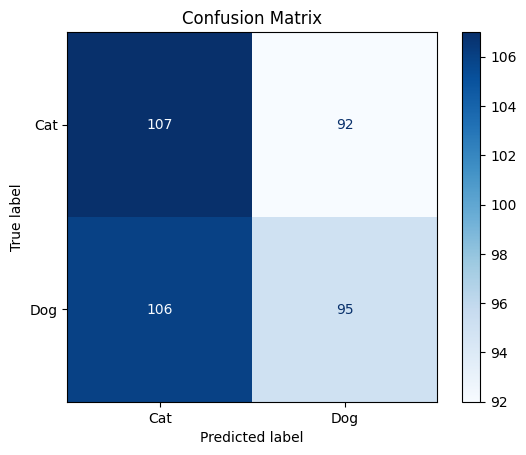

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()